In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("pruebamitad.csv")



In [3]:
df
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df = df[df['Company'] != 'Apple']


In [5]:

df['Weight'] = df['Weight'].str.replace('kg', '')


In [6]:
df.rename(columns={'Weight': 'Weight(kg)'}, inplace=True)

In [7]:
df['Memory'] = df['Memory'].replace('1TB', '1000', regex=True)

In [8]:
df.rename(columns={'Memory': 'Memory(GB)'}, inplace=True)

In [9]:
df['Memory(GB)'] = df['Memory(GB)'].str.replace('GB', '')

In [10]:
df['Ram'] = df['Ram'].str.replace('GB', '')

In [11]:
df['IPM'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPM' in x else 0)

In [12]:
df[['SSD', 'HDD']] = df['Memory(GB)'].str.split('+', expand=True)
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory(GB),Gpu,OpSys,Weight(kg),Price_euros,IPM,SSD,HDD
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.0,0,256 SSD,None
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500 HDD,AMD Radeon R5,Windows 10,2.1,400.0,0,500 HDD,None
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.3,1495.0,0,512 SSD,None
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.6,770.0,0,256 SSD,None
10,11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500 HDD,Intel HD Graphics 620,No OS,1.86,393.9,0,500 HDD,None


In [13]:
# Supongamos que tu DataFrame se llama df
df['FlashStorage'] = np.where(df['SSD'].str.contains('Flash Storage'), df["SSD"],np.nan)
df


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory(GB),Gpu,OpSys,Weight(kg),Price_euros,IPM,SSD,HDD,FlashStorage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.0,0,256 SSD,None,NaN
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500 HDD,AMD Radeon R5,Windows 10,2.1,400.0,0,500 HDD,None,NaN
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.3,1495.0,0,512 SSD,None,NaN
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.6,770.0,0,256 SSD,None,NaN
10,11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500 HDD,Intel HD Graphics 620,No OS,1.86,393.9,0,500 HDD,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,973,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.8,638.0,0,128 SSD,None,NaN
965,974,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.3,1499.0,0,512 SSD,None,NaN
966,975,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.5,229.0,0,64 Flash Storage,None,64 Flash Storage
967,976,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,0,1000 HDD,None,NaN


In [14]:

df['SSD'] = np.where(df['SSD'].str.contains('Flash Storage'), 0, df['SSD'])



In [15]:
df['SSD'] = df['SSD'].str.replace('SSD', '')
df['HDD'] = df['HDD'].str.replace('HDD', '')
df['FlashStorage'] = df['FlashStorage'].str.replace('Flash Storage', '')


In [16]:
df['HDD'] = np.where(df['SSD'].str.contains('HDD'), df["SSD"],0)
df['SSD'] = np.where(df['SSD'].str.contains('HDD'), 0, df['SSD'])

In [17]:
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory(GB),Gpu,OpSys,Weight(kg),Price_euros,IPM,SSD,HDD,FlashStorage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,NaN
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500 HDD,AMD Radeon R5,Windows 10,2.1,400.00,0,0,500 HDD,NaN
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.3,1495.00,0,512,0,NaN
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.6,770.00,0,256,0,NaN
10,11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500 HDD,Intel HD Graphics 620,No OS,1.86,393.90,0,0,500 HDD,NaN
11,12,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500 HDD,Intel HD Graphics 520,No OS,1.86,344.99,0,0,500 HDD,NaN
13,14,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256 SSD,AMD Radeon R5 M430,Windows 10,2.2,498.90,0,256,0,NaN
16,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256 SSD,AMD Radeon R5 M430,Windows 10,2.2,745.00,0,256,0,NaN
18,19,Lenovo,IdeaPad 320-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,1000 HDD,Nvidia GeForce 940MX,No OS,2.2,499.00,0,0,1000 HDD,NaN
19,20,Dell,XPS 13,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,128 SSD,Intel UHD Graphics 620,Windows 10,1.22,979.00,0,128,0,NaN


In [18]:
df=df.drop("Memory(GB)",axis=1)

In [19]:
df_grafica=df

In [20]:
df['HDD'] = df['HDD'].str.replace('HDD', '')


In [21]:
df['Ultra HD'] = df['ScreenResolution'].apply(lambda x: 1 if 'Ultra HD' in x else 0)
df['Full HD'] = df['ScreenResolution'].apply(lambda x: 1 if 'Full HD' in x else 0)
df['Quad HD+'] = df['ScreenResolution'].apply(lambda x: 1 if 'Quad HD+' in x else 0)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['4K'] = df['ScreenResolution'].apply(lambda x: 1 if '4K' in x else 0)
df['Retina Display'] = df['ScreenResolution'].apply(lambda x: 1 if 'Retina Display' in x else 0)

In [22]:
df['ScreenResolution'] = df['ScreenResolution'].str.replace('Full HD', '')
df['ScreenResolution'] = df['ScreenResolution'].str.replace('IPS', '')
df['ScreenResolution'] = df['ScreenResolution'].str.replace('Panel', '')
df['ScreenResolution'] = df['ScreenResolution'].str.replace('Ultra HD', '')
df['ScreenResolution'] = df['ScreenResolution'].str.replace('Quad HD+', '')
df['ScreenResolution'] = df['ScreenResolution'].str.replace('4K', '')
df['ScreenResolution'] = df['ScreenResolution'].str.replace('Touchscreen', '')
df['ScreenResolution'] = df['ScreenResolution'].str.replace('Retina Display', '')
df['ScreenResolution'] = df['ScreenResolution'].str.replace(' ', '')
df['ScreenResolution'] = df['ScreenResolution'].str.replace('/', '')


In [23]:
df[['Ancho', 'Alto']] = df['ScreenResolution'].str.split('x', expand=True)
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,...,HDD,FlashStorage,Ultra HD,Full HD,Quad HD+,Touchscreen,4K,Retina Display,Ancho,Alto
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,...,NaN,NaN,0,1,0,0,0,0,1920,1080
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows 10,...,500,NaN,0,0,0,0,0,0,1366,768
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel Core i7 8550U 1.8GHz,16,Nvidia GeForce MX150,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
9,10,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
10,11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,Intel HD Graphics 620,No OS,...,500,NaN,0,0,0,0,0,0,1366,768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,973,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,...,NaN,NaN,0,1,0,1,0,0,1920,1080
965,974,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,...,NaN,NaN,0,0,1,1,0,0,3200,1800
966,975,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,...,NaN,64,0,0,0,0,0,0,1366,768
967,976,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,...,1000,NaN,0,0,0,0,0,0,1366,768


In [24]:
df=df.drop("ScreenResolution",axis=1)
df=df.drop("Product",axis=1)


In [25]:

df['Hz'] = df['Cpu'].str[-6:]
df.loc[~df['Hz'].str.contains('\.'), 'Hz'] = df['Cpu'].str[-4:]

df['Hz'] = df['Hz'].str.replace('GHz', '')
df

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight(kg),Price_euros,...,FlashStorage,Ultra HD,Full HD,Quad HD+,Touchscreen,4K,Retina Display,Ancho,Alto,Hz
2,3,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.0,...,NaN,0,1,0,0,0,0,1920,1080,2.5
5,6,Acer,Notebook,15.6,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows 10,2.1,400.0,...,NaN,0,0,0,0,0,0,1366,768,3
8,9,Asus,Ultrabook,14.0,Intel Core i7 8550U 1.8GHz,16,Nvidia GeForce MX150,Windows 10,1.3,1495.0,...,NaN,0,1,0,0,0,0,1920,1080,1.8
9,10,Acer,Ultrabook,14.0,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.6,770.0,...,NaN,0,1,0,0,0,0,1920,1080,1.6
10,11,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,4,Intel HD Graphics 620,No OS,1.86,393.9,...,NaN,0,0,0,0,0,0,1366,768,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,973,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.8,638.0,...,NaN,0,1,0,1,0,0,1920,1080,2.5
965,974,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.3,1499.0,...,NaN,0,0,1,1,0,0,3200,1800,2.5
966,975,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.5,229.0,...,64,0,0,0,0,0,0,1366,768,1.6
967,976,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.0,...,NaN,0,0,0,0,0,0,1366,768,2.5


In [26]:
df = df[df['Cpu'].str.contains('Intel Core i5|Intel Core i3|Intel Core i7', na=False)]
df

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight(kg),Price_euros,...,FlashStorage,Ultra HD,Full HD,Quad HD+,Touchscreen,4K,Retina Display,Ancho,Alto,Hz
2,3,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,...,NaN,0,1,0,0,0,0,1920,1080,2.5
8,9,Asus,Ultrabook,14.0,Intel Core i7 8550U 1.8GHz,16,Nvidia GeForce MX150,Windows 10,1.3,1495.00,...,NaN,0,1,0,0,0,0,1920,1080,1.8
9,10,Acer,Ultrabook,14.0,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.6,770.00,...,NaN,0,1,0,0,0,0,1920,1080,1.6
10,11,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,4,Intel HD Graphics 620,No OS,1.86,393.90,...,NaN,0,0,0,0,0,0,1366,768,2.5
11,12,HP,Notebook,15.6,Intel Core i3 6006U 2GHz,4,Intel HD Graphics 520,No OS,1.86,344.99,...,NaN,0,1,0,0,0,0,1920,1080,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,970,Dell,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,AMD Radeon R5 M430,Linux,2.3,805.99,...,NaN,0,0,0,0,0,0,1366,768,2.7
963,972,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4,Nvidia GeForce 920M,Windows 10,2.2,720.32,...,NaN,0,0,0,0,0,0,1366,768,2.5
964,973,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.8,638.00,...,NaN,0,1,0,1,0,0,1920,1080,2.5
965,974,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.3,1499.00,...,NaN,0,0,1,1,0,0,3200,1800,2.5


In [27]:
df['Intel i3'] = df['Cpu'].apply(lambda x: 1 if 'Intel Core i3' in x else 0)
df['Intel i5'] = df['Cpu'].apply(lambda x: 1 if 'Intel Core i5' in x else 0)
df['Intel i7'] = df['Cpu'].apply(lambda x: 1 if 'Intel Core i7' in x else 0)

df['Cpu'] = df['Cpu'].str.replace('Intel Core i3', '')
df['Cpu'] = df['Cpu'].str.replace('Intel Core i5', '')
df['Cpu'] = df['Cpu'].str.replace('Intel Core i7', '')

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\40260951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Intel i3'] = df['Cpu'].apply(lambda x: 1 if 'Intel Core i3' in x else 0)
C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\40260951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Intel i5'] = df['Cpu'].apply(lambda x: 1 if 'Intel Core i5' in x else 0)
C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\40260951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [28]:
df

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight(kg),Price_euros,...,Quad HD+,Touchscreen,4K,Retina Display,Ancho,Alto,Hz,Intel i3,Intel i5,Intel i7
2,3,HP,Notebook,15.6,7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,...,0,0,0,0,1920,1080,2.5,0,1,0
8,9,Asus,Ultrabook,14.0,8550U 1.8GHz,16,Nvidia GeForce MX150,Windows 10,1.3,1495.00,...,0,0,0,0,1920,1080,1.8,0,0,1
9,10,Acer,Ultrabook,14.0,8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.6,770.00,...,0,0,0,0,1920,1080,1.6,0,1,0
10,11,HP,Notebook,15.6,7200U 2.5GHz,4,Intel HD Graphics 620,No OS,1.86,393.90,...,0,0,0,0,1366,768,2.5,0,1,0
11,12,HP,Notebook,15.6,6006U 2GHz,4,Intel HD Graphics 520,No OS,1.86,344.99,...,0,0,0,0,1920,1080,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,970,Dell,Notebook,15.6,7500U 2.7GHz,8,AMD Radeon R5 M430,Linux,2.3,805.99,...,0,0,0,0,1366,768,2.7,0,0,1
963,972,Asus,Notebook,15.6,6500U 2.5GHz,4,Nvidia GeForce 920M,Windows 10,2.2,720.32,...,0,0,0,0,1366,768,2.5,0,0,1
964,973,Lenovo,2 in 1 Convertible,14.0,6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.8,638.00,...,0,1,0,0,1920,1080,2.5,0,0,1
965,974,Lenovo,2 in 1 Convertible,13.3,6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.3,1499.00,...,1,1,0,0,3200,1800,2.5,0,0,1


In [29]:
def ajustar_frecuencia(cadena):
    if '.' in cadena[:-8]:
        return cadena[:-4]
    else:
        return cadena[:-6]

df['Cpu'] = df['Cpu'].apply(ajustar_frecuencia)


C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\1542865620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu'] = df['Cpu'].apply(ajustar_frecuencia)


In [30]:
df

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight(kg),Price_euros,...,Quad HD+,Touchscreen,4K,Retina Display,Ancho,Alto,Hz,Intel i3,Intel i5,Intel i7
2,3,HP,Notebook,15.6,7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,...,0,0,0,0,1920,1080,2.5,0,1,0
8,9,Asus,Ultrabook,14.0,8550U,16,Nvidia GeForce MX150,Windows 10,1.3,1495.00,...,0,0,0,0,1920,1080,1.8,0,0,1
9,10,Acer,Ultrabook,14.0,8250U,8,Intel UHD Graphics 620,Windows 10,1.6,770.00,...,0,0,0,0,1920,1080,1.6,0,1,0
10,11,HP,Notebook,15.6,7200U,4,Intel HD Graphics 620,No OS,1.86,393.90,...,0,0,0,0,1366,768,2.5,0,1,0
11,12,HP,Notebook,15.6,6006,4,Intel HD Graphics 520,No OS,1.86,344.99,...,0,0,0,0,1920,1080,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,970,Dell,Notebook,15.6,7500U,8,AMD Radeon R5 M430,Linux,2.3,805.99,...,0,0,0,0,1366,768,2.7,0,0,1
963,972,Asus,Notebook,15.6,6500U,4,Nvidia GeForce 920M,Windows 10,2.2,720.32,...,0,0,0,0,1366,768,2.5,0,0,1
964,973,Lenovo,2 in 1 Convertible,14.0,6500U,4,Intel HD Graphics 520,Windows 10,1.8,638.00,...,0,1,0,0,1920,1080,2.5,0,0,1
965,974,Lenovo,2 in 1 Convertible,13.3,6500U,16,Intel HD Graphics 520,Windows 10,1.3,1499.00,...,1,1,0,0,3200,1800,2.5,0,0,1


In [31]:
df['Cpu'] = df['Cpu'].str.replace('U', '')
df['Cpu'] = df['Cpu'].str.replace('HQ', '')
df['Cpu'] = df['Cpu'].str.replace('HK', '')
df['Cpu'] = df['Cpu'].str.replace('6500 2', '6500')

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\1615455576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu'] = df['Cpu'].str.replace('U', '')
C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\1615455576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu'] = df['Cpu'].str.replace('HQ', '')
C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\1615455576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [32]:
df=df.drop("Gpu",axis=1)

In [33]:
print(df["Cpu"].unique())

[' 7200 ' ' 8550 ' ' 8250 ' ' 6006' ' 7500 ' ' 7100 ' ' 7300 ' ' 8650 '
 ' 7130 ' ' 7700 ' ' 7560 ' ' 6200 ' ' 6006 ' ' 6920 ' ' 7Y54 ' ' 7820 '
 ' 6500 ' ' 6600 ' ' 7600 ' ' 6440 ' ' 6820 ' ' 7Y75 ' ' 7440 ' ' 7660 '
 ' 7Y57 ' ' 6700 ' ' 6100 ' ' 6300 ' ' 6260 ' ' 6500']


In [34]:


# Reemplazar los valores no numéricos con NaN
df['Cpu'] = pd.to_numeric(df['Cpu'], errors='coerce')

# Calcular el promedio de los valores numéricos
promedio = df['Cpu'].mean()

# Llenar los NaN con el promedio
df['Cpu'].fillna(promedio, inplace=True)


df


,laptop_ID,Company,TypeName,Inches,Cpu,Ram,OpSys,Weight(kg),Price_euros,IPM,...,Quad HD+,Touchscreen,4K,Retina Display,Ancho,Alto,Hz,Intel i3,Intel i5,Intel i7
2,3,HP,Notebook,15.6,7200.0,8,No OS,1.86,575.00,0,...,0,0,0,0,1920,1080,2.5,0,1,0
8,9,Asus,Ultrabook,14.0,8550.0,16,Windows 10,1.3,1495.00,0,...,0,0,0,0,1920,1080,1.8,0,0,1
9,10,Acer,Ultrabook,14.0,8250.0,8,Windows 10,1.6,770.00,0,...,0,0,0,0,1920,1080,1.6,0,1,0
10,11,HP,Notebook,15.6,7200.0,4,No OS,1.86,393.90,0,...,0,0,0,0,1366,768,2.5,0,1,0
11,12,HP,Notebook,15.6,6006.0,4,No OS,1.86,344.99,0,...,0,0,0,0,1920,1080,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,970,Dell,Notebook,15.6,7500.0,8,Linux,2.3,805.99,0,...,0,0,0,0,1366,768,2.7,0,0,1
963,972,Asus,Notebook,15.6,6500.0,4,Windows 10,2.2,720.32,0,...,0,0,0,0,1366,768,2.5,0,0,1
964,973,Lenovo,2 in 1 Convertible,14.0,6500.0,4,Windows 10,1.8,638.00,0,...,0,1,0,0,1920,1080,2.5,0,0,1
965,974,Lenovo,2 in 1 Convertible,13.3,6500.0,16,Windows 10,1.3,1499.00,0,...,1,1,0,0,3200,1800,2.5,0,0,1


In [35]:

df=df.drop("laptop_ID",axis=1)



In [36]:
df=df.drop("TypeName",axis=1)


In [37]:
import sklearn

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['companyM'] = label_encoder.fit_transform(df['Company'])
df

,Company,Inches,Cpu,Ram,OpSys,Weight(kg),Price_euros,IPM,SSD,HDD,...,Touchscreen,4K,Retina Display,Ancho,Alto,Hz,Intel i3,Intel i5,Intel i7,companyM
2,HP,15.6,7200.0,8,No OS,1.86,575.00,0,256,NaN,...,0,0,0,1920,1080,2.5,0,1,0,5
8,Asus,14.0,8550.0,16,Windows 10,1.3,1495.00,0,512,NaN,...,0,0,0,1920,1080,1.8,0,0,1,1
9,Acer,14.0,8250.0,8,Windows 10,1.6,770.00,0,256,NaN,...,0,0,0,1920,1080,1.6,0,1,0,0
10,HP,15.6,7200.0,4,No OS,1.86,393.90,0,0,500,...,0,0,0,1366,768,2.5,0,1,0,5
11,HP,15.6,6006.0,4,No OS,1.86,344.99,0,0,500,...,0,0,0,1920,1080,2,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,Dell,15.6,7500.0,8,Linux,2.3,805.99,0,0,1000,...,0,0,0,1366,768,2.7,0,0,1,2
963,Asus,15.6,6500.0,4,Windows 10,2.2,720.32,0,0,500,...,0,0,0,1366,768,2.5,0,0,1,1
964,Lenovo,14.0,6500.0,4,Windows 10,1.8,638.00,0,128,NaN,...,1,0,0,1920,1080,2.5,0,0,1,8
965,Lenovo,13.3,6500.0,16,Windows 10,1.3,1499.00,0,512,NaN,...,1,0,0,3200,1800,2.5,0,0,1,8


In [38]:
df=df.drop("Company",axis=1)
df=df.drop("OpSys",axis=1)

In [39]:
df

,Inches,Cpu,Ram,Weight(kg),Price_euros,IPM,SSD,HDD,FlashStorage,Ultra HD,...,Touchscreen,4K,Retina Display,Ancho,Alto,Hz,Intel i3,Intel i5,Intel i7,companyM
2,15.6,7200.0,8,1.86,575.00,0,256,NaN,NaN,0,...,0,0,0,1920,1080,2.5,0,1,0,5
8,14.0,8550.0,16,1.3,1495.00,0,512,NaN,NaN,0,...,0,0,0,1920,1080,1.8,0,0,1,1
9,14.0,8250.0,8,1.6,770.00,0,256,NaN,NaN,0,...,0,0,0,1920,1080,1.6,0,1,0,0
10,15.6,7200.0,4,1.86,393.90,0,0,500,NaN,0,...,0,0,0,1366,768,2.5,0,1,0,5
11,15.6,6006.0,4,1.86,344.99,0,0,500,NaN,0,...,0,0,0,1920,1080,2,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,15.6,7500.0,8,2.3,805.99,0,0,1000,NaN,0,...,0,0,0,1366,768,2.7,0,0,1,2
963,15.6,6500.0,4,2.2,720.32,0,0,500,NaN,0,...,0,0,0,1366,768,2.5,0,0,1,1
964,14.0,6500.0,4,1.8,638.00,0,128,NaN,NaN,0,...,1,0,0,1920,1080,2.5,0,0,1,8
965,13.3,6500.0,16,1.3,1499.00,0,512,NaN,NaN,0,...,1,0,0,3200,1800,2.5,0,0,1,8


In [40]:
df = df.apply(pd.to_numeric, errors='coerce')

In [41]:
df.to_csv('ahorasi.csv', index=False)

In [42]:


y = df['Price_euros']
y = y.fillna(0)
#normalize y
y = (y - y.min()) / (y.max() - y.min())


#normalize numerical data
df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#fill NaN with 0
df = df.fillna(0)

df

,Inches,Cpu,Ram,Weight(kg),Price_euros,IPM,SSD,HDD,FlashStorage,Ultra HD,...,Touchscreen,4K,Retina Display,Ancho,Alto,Hz,Intel i3,Intel i5,Intel i7,companyM
2,0.540984,0.451589,0.142857,0.269923,0.040972,0.0,0.256,0.0,0.0,0.0,...,0.0,0.0,0.0,0.223929,0.224138,0.833333,0.0,1.0,0.0,0.357143
8,0.278689,0.962179,0.428571,0.125964,0.200694,0.0,0.512,0.0,0.0,0.0,...,0.0,0.0,0.0,0.223929,0.224138,0.541667,0.0,0.0,1.0,0.071429
9,0.278689,0.848714,0.142857,0.203085,0.074826,0.0,0.256,0.0,0.0,0.0,...,0.0,0.0,0.0,0.223929,0.224138,0.458333,0.0,1.0,0.0,0.000000
10,0.540984,0.451589,0.000000,0.269923,0.009531,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.833333,0.0,1.0,0.0,0.357143
11,0.540984,0.000000,0.000000,0.269923,0.001040,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.223929,0.224138,0.625000,1.0,0.0,0.0,0.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.540984,0.565053,0.142857,0.383033,0.081075,0.0,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.916667,0.0,0.0,1.0,0.142857
963,0.540984,0.186838,0.000000,0.357326,0.066201,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.833333,0.0,0.0,1.0,0.071429
964,0.278689,0.186838,0.000000,0.254499,0.051910,0.0,0.128,0.0,0.0,0.0,...,1.0,0.0,0.0,0.223929,0.224138,0.833333,0.0,0.0,1.0,0.571429
965,0.163934,0.186838,0.428571,0.125964,0.201389,0.0,0.512,0.0,0.0,0.0,...,1.0,0.0,0.0,0.741310,0.741379,0.833333,0.0,0.0,1.0,0.571429


In [43]:
df=df.drop("Price_euros",axis=1)
df=df.drop("IPM",axis=1)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt




X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2,random_state=42)

reg = LinearRegression().fit(X_train, y_train)


y_pred = reg.predict(X_test)

print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-8.05030397e-02 -1.91445770e-02  2.39581595e-01  1.50962638e-01
  1.47263585e-01 -1.78258752e-02  9.71445147e-17 -7.81440461e-02
 -3.65102123e-02 -1.15994015e-01  3.43953524e-03 -7.81440461e-02
  7.11236625e-17  3.01270636e-01 -3.85876353e-02  4.53526481e-02
 -2.92362593e-02 -3.71900782e-04  2.96081600e-02  1.85087904e-02]
Mean squared error: 0.00
Coefficient of determination: 0.75


Análisis

Gráfica de Precios

In [45]:
Agrupado=df_grafica.groupby("Company")["Price_euros"].mean().reset_index()
Agrupado

,Company,Price_euros
0,Acer,642.650116
1,Asus,1065.301406
2,Chuwi,314.296667
3,Dell,1167.084091
4,Fujitsu,769.000000
5,Google,1677.666667
6,HP,971.905568
7,Huawei,1424.000000
8,LG,2299.000000
9,Lenovo,1039.524681


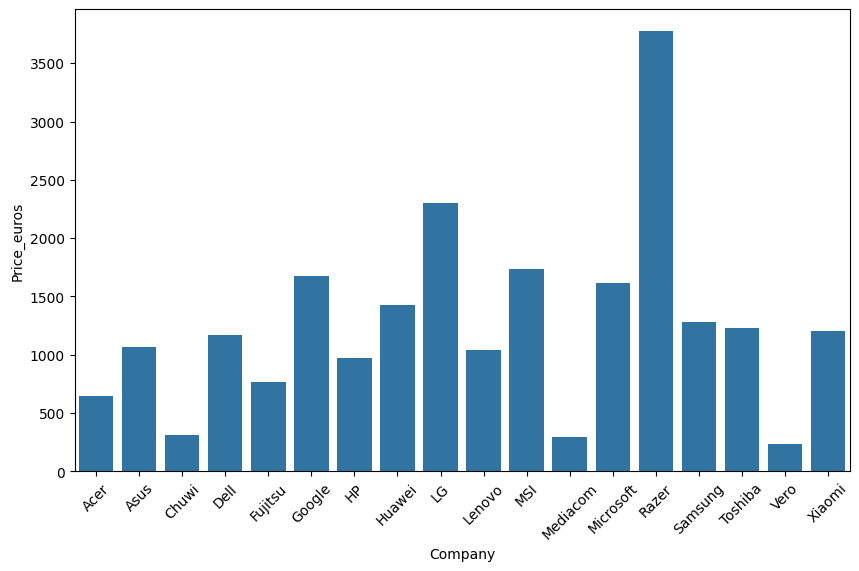

In [46]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="Company",y="Price_euros",data=Agrupado)
plt.xticks(rotation=45)
plt.show()

Relación de la Memoria RAM con el Precio

In [47]:
df_razer = df_grafica[df_grafica["Company"]=="Razer"]
df_razer

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,...,HDD,FlashStorage,Ultra HD,Full HD,Quad HD+,Touchscreen,4K,Retina Display,Ancho,Alto
196,200,Razer,Blade Pro,Gaming,17.3,3840x2160,Intel Core i7 7820HK 2.9GHz,32,Nvidia GeForce GTX 1080,Windows 10,...,NaN,NaN,1,0,0,1,1,0,3840,2160
647,655,Razer,Blade Pro,Gaming,14.0,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1060,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
778,787,Razer,Blade Pro,Gaming,14.0,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1060,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
897,906,Razer,Blade Pro,Gaming,14.0,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1060,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080


In [48]:
df_razer['Ram'] = df_razer['Ram'].astype(int)

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\1171436073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_razer['Ram'] = df_razer['Ram'].astype(int)


In [49]:
prom_ram_razer = df_razer.groupby("Company")["Ram"].mean().reset_index()
prom_ram_razer

,Company,Ram
0,Razer,20.0


In [50]:
df_razer['Weight(kg)'] = df_razer['Weight(kg)'].astype(float)

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\602636156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_razer['Weight(kg)'] = df_razer['Weight(kg)'].astype(float)


In [51]:
prom_weight = df_razer.groupby("Company")["Weight(kg)"].mean().reset_index()
prom_weight

,Company,Weight(kg)
0,Razer,2.335


In [52]:
df_razer_ram_weight = pd.merge(prom_weight, prom_ram_razer, on='Company')
df_razer_ram_weight

,Company,Weight(kg),Ram
0,Razer,2.335,20.0


In [53]:
df_razer_ram = df_razer[['Company', 'Ram']]
df_razer_ram

,Company,Ram
196,Razer,32
647,Razer,16
778,Razer,16
897,Razer,16


In [54]:
ram_distribution = df_razer_ram['Ram'].value_counts(normalize=True) * 100

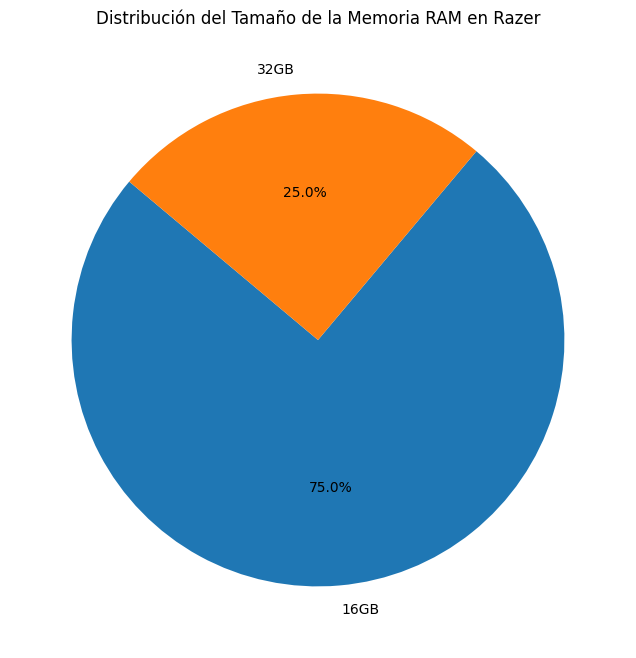

In [55]:
# Crear el gráfico circular
plt.figure(figsize=(8, 8))  # Ajusta el tamaño del gráfico según tus necesidades
plt.pie(ram_distribution, labels=ram_distribution.index.map(str) + 'GB', autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Tamaño de la Memoria RAM en Razer')
plt.show()

In [56]:
df_vero = df_grafica[df_grafica["Company"]=="Vero"]
df_vero

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,...,HDD,FlashStorage,Ultra HD,Full HD,Quad HD+,Touchscreen,4K,Retina Display,Ancho,Alto
191,195,Vero,K147 (N3350/4GB/32GB/FHD/W10),Notebook,14.0,1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,Intel HD Graphics 500,Windows 10,...,NaN,32,0,1,0,0,0,0,1920,1080
791,800,Vero,K146 (N3350/4GB/32GB/W10),Notebook,14.0,1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,Intel HD Graphics 500,Windows 10,...,NaN,32,0,0,0,0,0,0,1920,1080


In [57]:
df_vero_ram = df_vero[['Company', 'Ram']]
df_vero_ram

,Company,Ram
191,Vero,4
791,Vero,4


In [58]:
df_vero['Ram'] = df_vero['Ram'].astype(int)

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\2955150159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vero['Ram'] = df_vero['Ram'].astype(int)


In [59]:
prom_ram_vero = df_vero.groupby("Company")["Ram"].mean().reset_index()
prom_ram_vero

,Company,Ram
0,Vero,4.0


In [60]:
prom_ram_razer['Ram'] = prom_ram_razer['Ram'].astype(int)
prom_ram_razer

,Company,Ram
0,Razer,20


In [61]:
prom_ram_vero['Ram'] = prom_ram_vero['Ram'].astype(int)
prom_ram_vero

,Company,Ram
0,Vero,4


In [62]:
df_ram_vero_razer = pd.concat([prom_ram_vero, prom_ram_razer], ignore_index=True)
df_ram_vero_razer

,Company,Ram
0,Vero,4
1,Razer,20


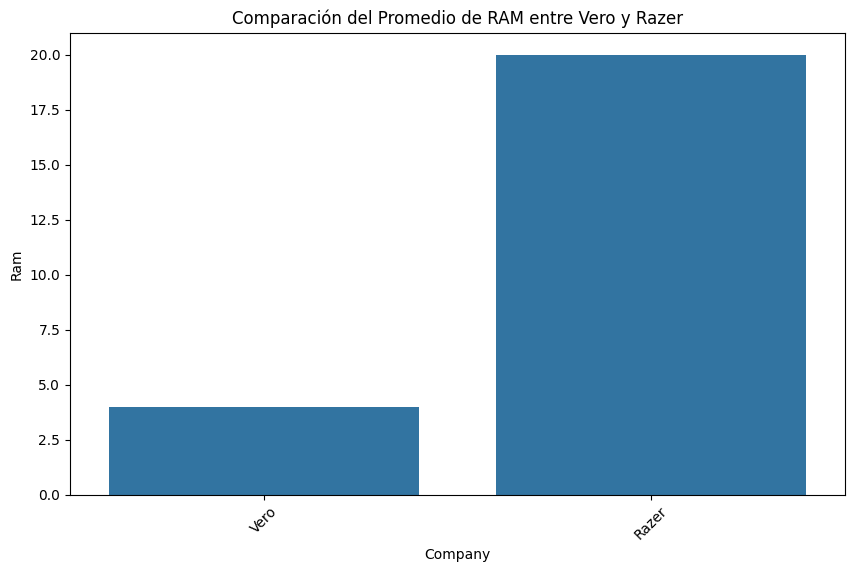

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Company",y="Ram",data= df_ram_vero_razer)
plt.title('Comparación del Promedio de RAM entre Vero y Razer')
plt.xticks(rotation=45)
plt.show()

Relación del Tmaño de Almacenamiento con el Precio

In [64]:
df_razer_memory = df_razer[['Company', 'HDD', 'SSD']]
df_razer_memory

,Company,HDD,SSD
196,Razer,NaN,1000
647,Razer,NaN,256
778,Razer,NaN,512
897,Razer,NaN,1000


In [65]:
df_razer_memory.drop('HDD', axis=1, inplace=True)
df_razer_memory

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\4216649297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_razer_memory.drop('HDD', axis=1, inplace=True)


,Company,SSD
196,Razer,1000
647,Razer,256
778,Razer,512
897,Razer,1000


In [66]:
df_razer_memory['SSD'] = df_razer_memory['SSD'].astype(int)

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\2068111169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_razer_memory['SSD'] = df_razer_memory['SSD'].astype(int)


In [67]:
memory_distribution_r = df_razer_memory['SSD'].value_counts(normalize=True) * 100

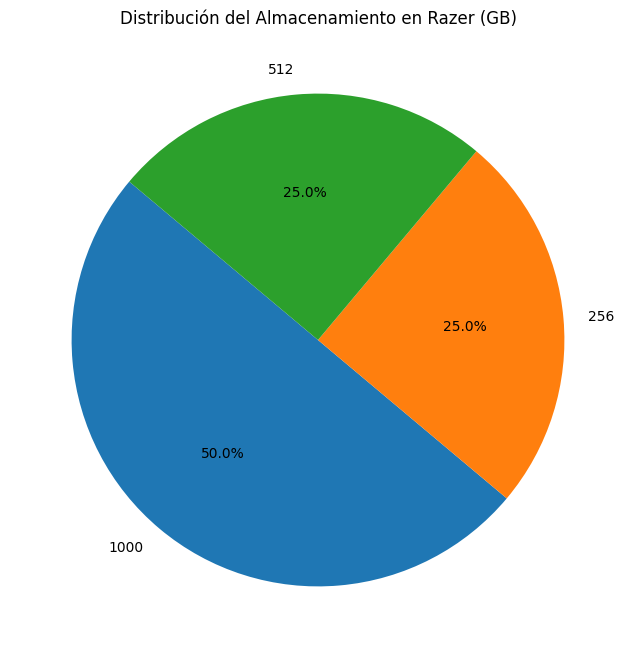

In [68]:
plt.figure(figsize=(8, 8))  # Ajusta el tamaño del gráfico según tus necesidades
# Crear el gráfico de pastel
plt.pie(memory_distribution_r, labels=memory_distribution_r.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Almacenamiento en Razer (GB)')
plt.show()

In [69]:
prom_memory_razer = df_razer_memory.groupby("Company")["SSD"].mean().reset_index()
prom_memory_razer

,Company,SSD
0,Razer,692.0


In [70]:
df_vero_memory = df_vero[['Company', 'HDD', 'SSD', 'FlashStorage']]
df_vero_memory

,Company,HDD,SSD,FlashStorage
191,Vero,NaN,0,32
791,Vero,NaN,0,32


In [71]:
df_vero_memory.drop('HDD', axis=1, inplace=True)
df_vero_memory.drop('SSD', axis=1, inplace=True)
df_vero_memory

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\1854061312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vero_memory.drop('HDD', axis=1, inplace=True)
C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\1854061312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vero_memory.drop('SSD', axis=1, inplace=True)


,Company,FlashStorage
191,Vero,32
791,Vero,32


In [72]:
df_vero_memory['FlashStorage'] = df_vero_memory['FlashStorage'].astype(int)

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\1461423684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vero_memory['FlashStorage'] = df_vero_memory['FlashStorage'].astype(int)


In [73]:
prom_memory_vero = df_vero_memory.groupby("Company")["FlashStorage"].mean().reset_index()
prom_memory_vero

,Company,FlashStorage
0,Vero,32.0


In [74]:
prom_memory_razer.rename(columns={'SSD': 'Storage'}, inplace=True)
prom_memory_razer

,Company,Storage
0,Razer,692.0


In [75]:
prom_memory_vero.rename(columns={'FlashStorage': 'Storage'}, inplace=True)
prom_memory_vero

,Company,Storage
0,Vero,32.0


In [76]:
df_memory_vero_razer = pd.concat([prom_memory_vero, prom_memory_razer], ignore_index=True)
df_memory_vero_razer

,Company,Storage
0,Vero,32.0
1,Razer,692.0


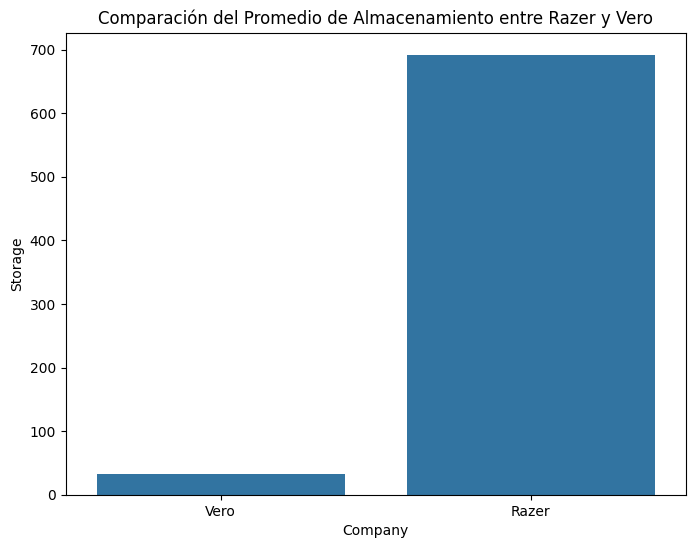

In [77]:
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus necesidades
sns.barplot(x='Company', y='Storage', data= df_memory_vero_razer)
plt.title('Comparación del Promedio de Almacenamiento entre Razer y Vero')
plt.show()

Características de las Compañías con Laptops Más Costosas

In [78]:
df_LG = df_grafica[df_grafica["Company"]=="LG"]
df_LG

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,...,HDD,FlashStorage,Ultra HD,Full HD,Quad HD+,Touchscreen,4K,Retina Display,Ancho,Alto
678,686,LG,Gram 15Z975,Ultrabook,15.6,1920x1080,Intel Core i7 8550U 1.8GHz,8,Intel HD Graphics 620,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080


In [79]:
df_MSI = df_grafica[df_grafica["Company"]=="MSI"]
df_MSI

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,...,HDD,FlashStorage,Ultra HD,Full HD,Quad HD+,Touchscreen,4K,Retina Display,Ancho,Alto
58,59,MSI,GS73VR 7RG,Gaming,17.3,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1070,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
73,75,MSI,GL72M 7RDX,Gaming,17.3,1920x1080,Intel Core i5 7300HQ 2.5GHz,8,Nvidia GeForce GTX 1050,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
108,111,MSI,GP62M 7REX,Gaming,15.6,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1050 Ti,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
121,124,MSI,GS63VR 7RG,Gaming,15.6,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1070,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
148,151,MSI,GE72MVR 7RG,Gaming,17.3,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1070,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
153,156,MSI,GE73VR 7RE,Gaming,17.3,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1060,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
165,169,MSI,GE63VR 7RE,Gaming,15.6,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1060,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
177,181,MSI,GT80S 6QF-074US,Gaming,18.4,1920x1080,Intel Core i7 6920HQ 2.9GHz,32,Nvidia GTX 980 SLI,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
258,263,MSI,GT73EVR 7RE,Gaming,17.3,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1070,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080
312,317,MSI,GE63VR 7RF,Gaming,15.6,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1070,Windows 10,...,NaN,NaN,0,1,0,0,0,0,1920,1080


In [80]:
df_MSI_ram = df_MSI[['Company', 'Ram']]
df_MSI_ram

,Company,Ram
58,MSI,16
73,MSI,8
108,MSI,16
121,MSI,16
148,MSI,16
153,MSI,16
165,MSI,16
177,MSI,32
258,MSI,16
312,MSI,16


In [81]:
df_MSI_ram['Ram'] = df_MSI_ram['Ram'].astype(int)

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\121402141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSI_ram['Ram'] = df_MSI_ram['Ram'].astype(int)


In [82]:
prom_MSI_ram = df_MSI_ram.groupby("Company")["Ram"].mean().reset_index()
prom_MSI_ram

,Company,Ram
0,MSI,13.268293


In [83]:
df_LG_ram = df_LG[['Company', 'Ram']]
df_LG_ram

,Company,Ram
678,LG,8


In [84]:
df_LG_ram['Ram'] = df_LG_ram['Ram'].astype(int)

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\287759711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LG_ram['Ram'] = df_LG_ram['Ram'].astype(int)


In [85]:
prom_LG_ram = df_LG_ram.groupby("Company")["Ram"].mean().reset_index()
prom_LG_ram

,Company,Ram
0,LG,8.0


In [86]:
ram_razer_LG_MSI = pd.concat([prom_LG_ram, prom_MSI_ram, prom_ram_razer], ignore_index=True)
ram_razer_LG_MSI

,Company,Ram
0,LG,8.000000
1,MSI,13.268293
2,Razer,20.000000


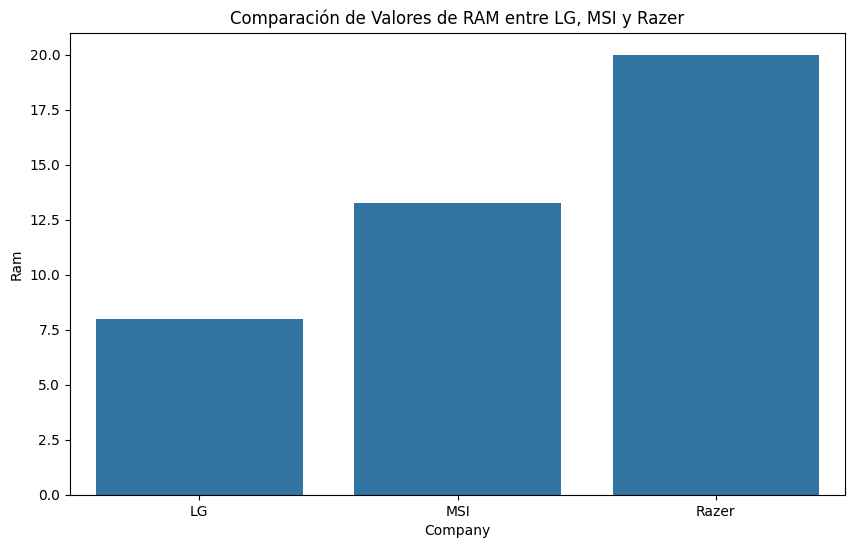

In [87]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Company', y='Ram', data= ram_razer_LG_MSI)
plt.title('Comparación de Valores de RAM entre LG, MSI y Razer')
plt.show()

In [88]:
df_LG_memory = df_LG[['Company', 'HDD', 'SSD', 'FlashStorage']]
df_LG_memory

,Company,HDD,SSD,FlashStorage
678,LG,NaN,512,NaN


In [89]:
df_LG_memory.drop('HDD', axis=1, inplace=True)
df_LG_memory.drop('FlashStorage', axis=1, inplace=True)
df_LG_memory

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\3457335064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LG_memory.drop('HDD', axis=1, inplace=True)
C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\3457335064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LG_memory.drop('FlashStorage', axis=1, inplace=True)


,Company,SSD
678,LG,512


In [90]:
df_LG_memory.rename(columns={'SSD': 'Storage'}, inplace=True)
df_LG_memory

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\560828863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LG_memory.rename(columns={'SSD': 'Storage'}, inplace=True)


,Company,Storage
678,LG,512


In [91]:
df_LG_memory['Storage'] = df_LG_memory['Storage'].astype(int)

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\3803960683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LG_memory['Storage'] = df_LG_memory['Storage'].astype(int)


In [92]:
prom_LG_memory = df_LG_memory.groupby("Company")["Storage"].mean().reset_index()
prom_LG_memory

,Company,Storage
0,LG,512.0


In [93]:
df_MSI_memory = df_MSI[['Company', 'HDD', 'SSD', 'FlashStorage']]
df_MSI_memory

,Company,HDD,SSD,FlashStorage
58,MSI,NaN,256,NaN
73,MSI,NaN,128,NaN
108,MSI,NaN,256,NaN
121,MSI,NaN,256,NaN
148,MSI,NaN,256,NaN
153,MSI,NaN,256,NaN
165,MSI,NaN,256,NaN
177,MSI,NaN,512,NaN
258,MSI,NaN,512,NaN
312,MSI,NaN,256,NaN


In [94]:
df_MSI_memory.drop('FlashStorage', axis=1, inplace=True)
df_MSI_memory

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\806228993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSI_memory.drop('FlashStorage', axis=1, inplace=True)


,Company,HDD,SSD
58,MSI,NaN,256
73,MSI,NaN,128
108,MSI,NaN,256
121,MSI,NaN,256
148,MSI,NaN,256
153,MSI,NaN,256
165,MSI,NaN,256
177,MSI,NaN,512
258,MSI,NaN,512
312,MSI,NaN,256


In [95]:
df_MSI_memory.rename(columns={'SSD': 'Storage'}, inplace=True)
df_MSI_memory

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\3966816139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSI_memory.rename(columns={'SSD': 'Storage'}, inplace=True)


,Company,HDD,Storage
58,MSI,NaN,256
73,MSI,NaN,128
108,MSI,NaN,256
121,MSI,NaN,256
148,MSI,NaN,256
153,MSI,NaN,256
165,MSI,NaN,256
177,MSI,NaN,512
258,MSI,NaN,512
312,MSI,NaN,256


In [96]:
df_MSI_memory.loc[df_MSI_memory.index == 835, 'Storage'] = 1000
df_MSI_memory

,Company,HDD,Storage
58,MSI,NaN,256
73,MSI,NaN,128
108,MSI,NaN,256
121,MSI,NaN,256
148,MSI,NaN,256
153,MSI,NaN,256
165,MSI,NaN,256
177,MSI,NaN,512
258,MSI,NaN,512
312,MSI,NaN,256


In [97]:
df_MSI_memory.drop('HDD', axis=1, inplace=True)
df_MSI_memory

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\378811826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSI_memory.drop('HDD', axis=1, inplace=True)


,Company,Storage
58,MSI,256
73,MSI,128
108,MSI,256
121,MSI,256
148,MSI,256
153,MSI,256
165,MSI,256
177,MSI,512
258,MSI,512
312,MSI,256


In [98]:
df_MSI_memory['Storage'] = df_MSI_memory['Storage'].astype(int)

C:\Users\hvjos\AppData\Local\Temp\ipykernel_2644\1116491070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSI_memory['Storage'] = df_MSI_memory['Storage'].astype(int)


In [99]:
prom_MSI_memory = df_MSI_memory.groupby("Company")["Storage"].mean().reset_index()
prom_MSI_memory

,Company,Storage
0,MSI,249.170732


In [100]:
storage_razer_LG_MSI = pd.concat([prom_LG_memory, prom_MSI_memory, prom_memory_razer], ignore_index=True)
storage_razer_LG_MSI

,Company,Storage
0,LG,512.000000
1,MSI,249.170732
2,Razer,692.000000


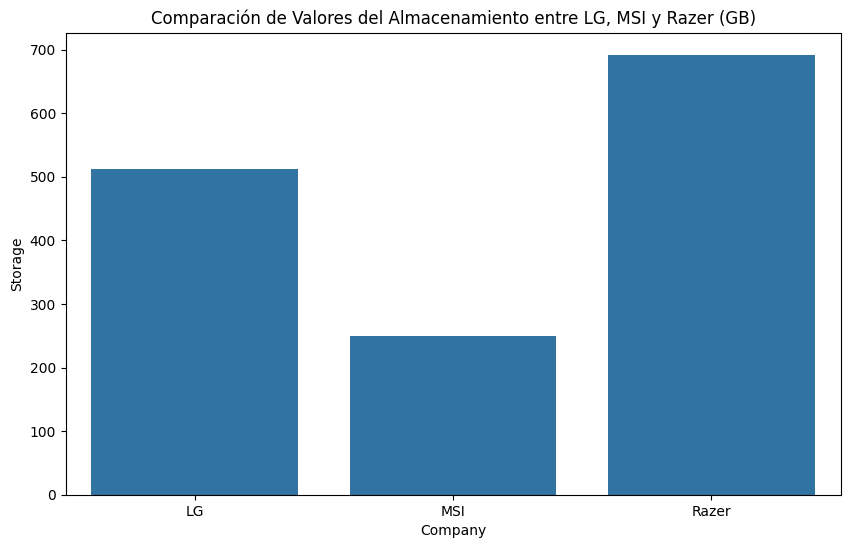

In [101]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Company', y='Storage', data= storage_razer_LG_MSI)
plt.title('Comparación de Valores del Almacenamiento entre LG, MSI y Razer (GB)')
plt.show()

Comparación de los Procesadores Usados

In [103]:
df_CPU_razer = df_razer[['Company', 'Cpu']]
df_CPU_razer

,Company,Cpu
196,Razer,Intel Core i7 7820HK 2.9GHz
647,Razer,Intel Core i7 7700HQ 2.8GHz
778,Razer,Intel Core i7 7700HQ 2.8GHz
897,Razer,Intel Core i7 7700HQ 2.8GHz


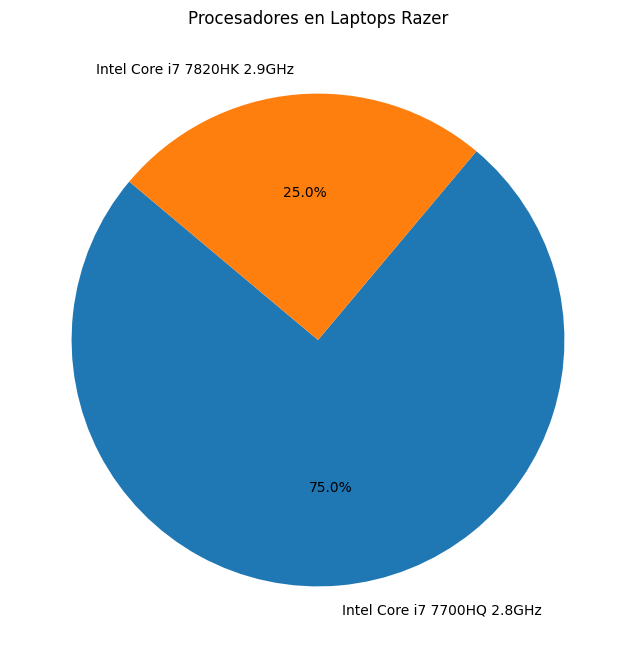

In [104]:
CPU_distribution = df_CPU_razer['Cpu'].value_counts(normalize=True) * 100
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Ajusta el tamaño del gráfico según tus necesidades
plt.pie(CPU_distribution, labels= CPU_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Procesadores en Laptops Razer')
plt.show()


In [105]:
df_CPU_vero = df_vero[['Company', 'Cpu']]
df_CPU_vero

,Company,Cpu
191,Vero,Intel Celeron Dual Core N3350 1.1GHz
791,Vero,Intel Celeron Dual Core N3350 1.1GHz


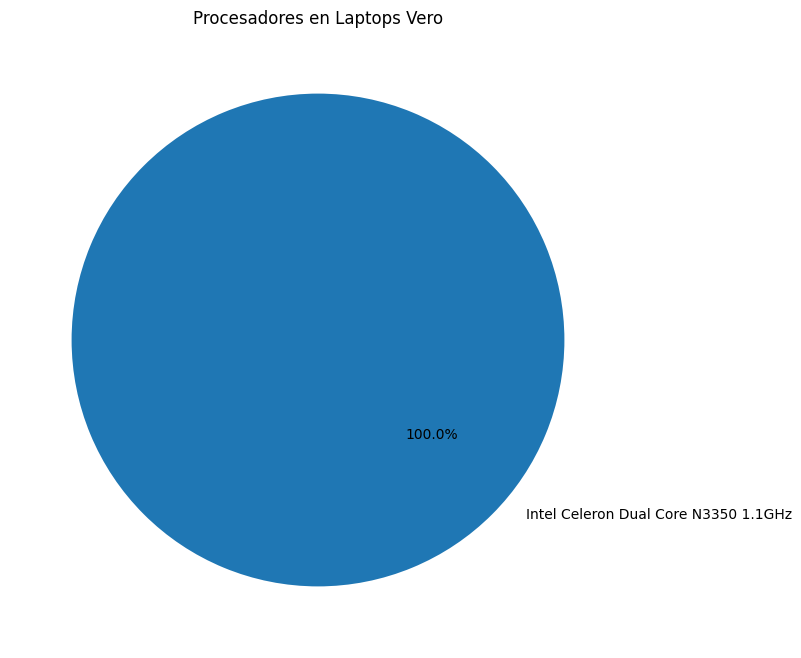

In [107]:
CPU_distribution_vero = df_CPU_vero['Cpu'].value_counts(normalize=True) * 100
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Ajusta el tamaño del gráfico según tus necesidades
plt.pie(CPU_distribution_vero, labels= CPU_distribution_vero.index, autopct='%1.1f%%', startangle=140)
plt.title('Procesadores en Laptops Vero')
plt.show()